<a href="https://colab.research.google.com/github/menpente/lenguaje_claro_cyc_2/blob/main/tree/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [ ]:
#Importamos las librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import textstat

In [ ]:
url = ''

In [ ]:
#Descargamos los textos y los guardamos en una tabla
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extracting all the links from the page
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

texts = []
for link in links:
    if link is not None:# and link.startswith("/"):
        full_url = url + link
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extracting all the text from the page
        text = soup.get_text()
        if text:
            texts.append(text)
        else:
            texts.append("")  # add empty string when no text is found

df = pd.DataFrame()
df['links'] = pd.Series(links)
df['texts'] = pd.Series(texts)

ConnectionError: HTTPSConnectionPool(host='www.aragon.eshttps', port=443): Max retries exceeded with url: //www.aragon.es (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f33c72cfd00>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [ ]:
df.dropna()

,links,texts
0,#content,\n\n\n\n\n\n\n\n\n\nTemas. Gobierno de Aragón\...
1,#footer,\n\n\n\n\n\n\n\n\n\nActividades industriales y...
2,#navMenuButton,\n\n\n\n\n\n\n\n\n\nActividades industriales. ...
3,https://www.aragon.es,\n\n\n\n\n\n\n\n\n\nAyudas y subvenciones en e...
4,/temas,\n\n\n\n\n\n\n\n\n\nEnergía. Gobierno de Aragó...
...,...,...
153,/tramites/aportacion-de-documentos-a-procedimi...,\n\n\n\n\n\n\n\n\n\nTrámites por tema. Trámite...
154,/tramites/interponer-recursos-ante-la-administ...,\n\n\n\n\n\n\n\n\n\nTrámites por finalidad. Tr...
155,/tramites/notificaciones-electronicas,\n\n\n\n\n\n\n\n\n\nServicios de la Sede elect...
156,/tramites/registro-electronico-general,\n\n\n\n\n\n\n\n\n\nToda la información y ayud...


In [ ]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num sentences,num palabras,fdz huerta,tiempo lectura,num oraciones,palabras/oración
0,#content,\n\n\n\n\n\n\n\n\n\nTemas. Gobierno de Aragón\...,23,1068,33.51,103.37,23,46.434783
1,#footer,\n\n\n\n\n\n\n\n\n\nActividades industriales y...,121,4716,47.06,439.72,121,38.975207
2,#navMenuButton,\n\n\n\n\n\n\n\n\n\nActividades industriales. ...,91,3665,45.73,349.93,91,40.274725
4,/temas,\n\n\n\n\n\n\n\n\n\nEnergía. Gobierno de Aragó...,52,3268,22.78,307.08,52,62.846154
7,#subMenuCollapsable0,\n\n\n\n\n\n\n\n\n\nAtención social y dependen...,70,3988,28.70,366.46,70,56.971429


Distribución de lecturabilidad en aragon.es


<AxesSubplot: >

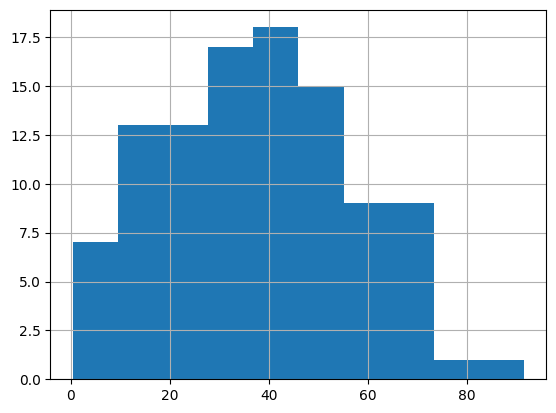

In [ ]:
df['fdz huerta'].hist()

In [ ]:
#Guardamos la tabla en un fichero csv
df.to_csv("")

In [ ]:
print ('media de oraciones por archivo:')
print (round (df['num sentences'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
67.0
media de nivel de lectura:
51.0
media de tiempo de lectura (segundos):
223.0


<AxesSubplot: >

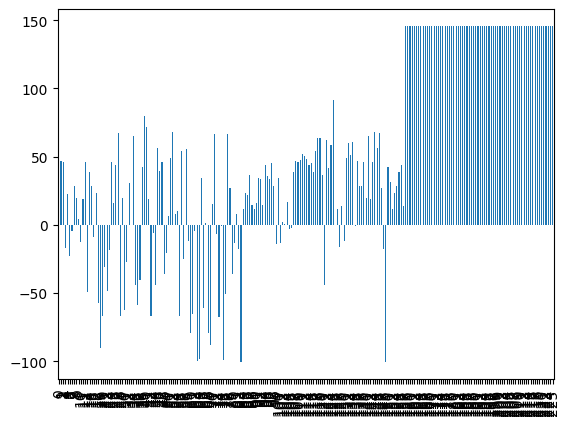

In [ ]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>